The goal of this project is :
 - Identify main reason for customer satisfaction or dissatisfaction
 - Predict satisfaction level by category and product type


In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('rslp')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
#import string
%matplotlib inline


import numpy
import matplotlib.pyplot as plt
import string
import re
#from gensim import corpora
#from gensim.models import Phrases
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# imports
%matplotlib inline

from ds_voc.text_processing import TextProcessing

[nltk_data] Downloading package wordnet to /Users/anel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/anel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /Users/anel/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


# Preprocessing

In [47]:
reviews = pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset.csv', header=1 )
reviews
reviews.review_comment_title = reviews.review_comment_title.fillna('')
reviews.review_comment_message = reviews.review_comment_message.fillna('')
reviews["review_comment"] = reviews['review_comment_title'].map(str) + ' ' + reviews['review_comment_message'].map(str)
reviews['review_comment'] = reviews['review_comment'].apply(lambda x: ' '.join(pd.unique(x.split())))
#reviews_only = reviews[pd.notnull(reviews['review_comment'])]
reviews.head()
reviews = reviews[pd.notnull(reviews['review_comment_title']) | pd.notnull(reviews['review_comment_message'])]
reviews['review_comment']  = reviews['review_comment'] .str.replace('[^\w\s]','')
reviews['review_comment']  = reviews['review_comment'].str.lower()
reviews.head()



/Users/anel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,DELIVERY,quality,...,cs,price,delivery,delivery_not del,quality .1,quantity.1,wrong_item,cs.1,Unnamed: 19,review_comment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,1/18/18 0:00,1/18/18 21:46,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,3/10/18 0:00,3/11/18 3:05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2/17/18 0:00,2/18/18 14:36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,4/21/17 0:00,4/21/17 22:02,Recebi bem antes do prazo estipulado.,1.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,recebi bem antes do prazo estipulado
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,3/1/18 0:00,3/2/18 10:26,Parabéns lojas lannister adorei comprar pela I...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,parabéns lojas lannister adorei comprar pela i...


In [3]:
from nltk.stem.porter import PorterStemmer
stemmer = nltk.stem.RSLPStemmer()
stopwords = nltk.corpus.stopwords.words('portuguese')
#stopwords = set(stopwords) - set(('não'))
#noise_words = ['recebemo', 'recebimento', 'nan','produto','correio', 'entregu','recomendo','compra', 'comprar','recebi', 'compra', 'entregu', 'entrega', 'entregoa', 'comprei',  'veio', 'é', 'pedido' , 'chegou', 'apena']
#recebemo" + 0.009*"funciona" + 0.009*"recebimento"
#" + 0.025*"veio" + 0.024*"é" + 0.017*"entregu" + 0.013*"pedido" + 0.013*"chegou" + 0.011*"apena" + 0.011*"qualidad" + 0.010*"recomendo"



reviews['review_comment_t']  = reviews['review_comment'] .str.replace('[^\w\s]','')
reviews['review_comment_t']  = reviews['review_comment_t'] .str.lower().str.split()
#reviews['review_comment_t'] =  reviews['review_comment_t'].apply(lambda x: [item for item in x if item not in stopwords ])

#reviews['review_comment_t'] =  reviews['review_comment_t'].apply(lambda x: [item for item in x if item not in noise_words ])

reviews['review_comment_t_stem'] = reviews['review_comment_t'].apply(lambda x: [stemmer.stem(y) for y in x])
reviews[reviews['review_score']<3][['review_comment','review_comment_t']].head()
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,DELIVERY,quality,...,delivery,delivery_not del,quality .1,quantity.1,wrong_item,cs.1,Unnamed: 19,review_comment,review_comment_t,review_comment_t_stem
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,1/18/18 0:00,1/18/18 21:46,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,[],[]
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,3/10/18 0:00,3/11/18 3:05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,[],[]
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2/17/18 0:00,2/18/18 14:36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,[],[]
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,4/21/17 0:00,4/21/17 22:02,Recebi bem antes do prazo estipulado.,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,recebi bem antes do prazo estipulado,"[recebi, bem, antes, do, prazo, estipulado]","[receb, bem, ant, do, praz, estipul]"
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,3/1/18 0:00,3/2/18 10:26,Parabéns lojas lannister adorei comprar pela I...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,parabéns lojas lannister adorei comprar pela i...,"[parabéns, lojas, lannister, adorei, comprar, ...","[parabém, loj, lannist, ador, compr, pel, inte..."
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,,,4/13/18 0:00,4/16/18 0:39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,[],[]
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,,,7/16/17 0:00,7/18/17 19:30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,[],[]
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,,,8/14/18 0:00,8/14/18 21:36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,[],[]
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,,,5/17/17 0:00,5/18/17 12:05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,[],[]
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,5/22/18 0:00,5/23/18 16:45,recomendoaparelho eficiente. no site a marca d...,0.0,0.0,...,0.0,0.0,0,0.0,1.0,0.0,NaN,recomendo aparelho eficiente no site a marca d...,"[recomendo, aparelho, eficiente, no, site, a, ...","[recom, aparelh, efici, no, sit, a, marc, do, ..."


# Exploratory sentiment analysis

In [4]:
reviews['review_pos_neg'] = reviews['review_score'] 
reviews.head()

#reviews_only['review_pos_neg'] ([0, 1, 2, 3, 4, 5], ['neg', 'neg', 'neg', 'neg', 'pos', 'pos'])
reviews['review_pos_neg'] = reviews['review_pos_neg'].map({1: 'neg', 2: 'neg', 3: 'neg', 4: 'neg', 5:'pos' })
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,DELIVERY,quality,...,delivery_not del,quality .1,quantity.1,wrong_item,cs.1,Unnamed: 19,review_comment,review_comment_t,review_comment_t_stem,review_pos_neg
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,1/18/18 0:00,1/18/18 21:46,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,[],[],neg
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,3/10/18 0:00,3/11/18 3:05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,[],[],pos
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2/17/18 0:00,2/18/18 14:36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,[],[],pos
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,4/21/17 0:00,4/21/17 22:02,Recebi bem antes do prazo estipulado.,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,recebi bem antes do prazo estipulado,"[recebi, bem, antes, do, prazo, estipulado]","[receb, bem, ant, do, praz, estipul]",pos
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,3/1/18 0:00,3/2/18 10:26,Parabéns lojas lannister adorei comprar pela I...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,parabéns lojas lannister adorei comprar pela i...,"[parabéns, lojas, lannister, adorei, comprar, ...","[parabém, loj, lannist, ador, compr, pel, inte...",pos


In [5]:

df = reviews[['review_comment_t_stem', 'review_pos_neg']]
df.apply(tuple, axis=1)
df.head()

,review_comment_t_stem,review_pos_neg
0,[],neg
1,[],pos
2,[],pos
3,"[receb, bem, ant, do, praz, estipul]",pos
4,"[parabém, loj, lannist, ador, compr, pel, inte...",pos


In [6]:
sum = []
for wlist in reviews['review_comment_t_stem']:
  sum = sum + wlist

KeyboardInterrupt: 

In [ ]:
mergedlist = list(sum)
documents = [tuple(x) for x in df.values]

In [ ]:
all_words = nltk.FreqDist(mergedlist)
word_features = list(all_words)[:600]
word_features

In [ ]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features
word_features

In [ ]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print('Accuracy: ', nltk.classify.accuracy(classifier, test_set))
print(classifier)
print(classifier.show_most_informative_features(400))
print(classifier.most_informative_features(400))



Using exploratory sentiment analysis revieled few main reson for satisfaction/dissatisfaction: 
- Quality of a product(s) - senatnces describing color, size, diemntions, aesthetic qualities inducate that review is about quality, it could be both positive and negative.  
- Quantity of product(s) - lack of full order. Mostly in negative tone, this reviews are ususlly complaints about the difference between the number of products aht was ordered and teh number of products that was delivered.
- Delivery - There are a lot of verbs describing delivery , verb  'delivered' (entregue) and others may not signify any connotation and may appear in othe contexts. And there adverbes that refer to timing that actually means that the comment is about the delivery.
- Costumer service - there are some verbs that may refer to costmer service: email, phone.

While this sentiment analysis may show how strong a word is associated with the reason for satisfaction or dissaisfaction with an order.




In order to process review data was labeled, manual lableing revieled more resons, some of them more common: product was not delivered at all, and some of them are less common, i.e. wrong item. Costumer service category proved to be an uncommun complaint too.

In [7]:
reviews = pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset.csv', header=1 )
reviews
reviews.review_comment_title = reviews.review_comment_title.fillna('')
reviews.review_comment_message = reviews.review_comment_message.fillna('')
reviews["review_comment"] = reviews['review_comment_title'].map(str) + ' ' + reviews['review_comment_message'].map(str)
reviews['review_comment'] = reviews['review_comment'].apply(lambda x: ' '.join(pd.unique(x.split())))
reviews.head()
reviews = reviews[pd.notnull(reviews['review_comment_title']) | pd.notnull(reviews['review_comment_message'])]
reviews['review_comment']  = reviews['review_comment'] .str.replace('[^\w\s]','')
reviews['review_comment']  = reviews['review_comment'].str.lower()
reviews.head()


/Users/anel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,DELIVERY,quality,...,cs,price,delivery,delivery_not del,quality .1,quantity.1,wrong_item,cs.1,Unnamed: 19,review_comment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,1/18/18 0:00,1/18/18 21:46,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,3/10/18 0:00,3/11/18 3:05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2/17/18 0:00,2/18/18 14:36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,4/21/17 0:00,4/21/17 22:02,Recebi bem antes do prazo estipulado.,1.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,recebi bem antes do prazo estipulado
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,3/1/18 0:00,3/2/18 10:26,Parabéns lojas lannister adorei comprar pela I...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,parabéns lojas lannister adorei comprar pela i...


In [ ]:
list(reviews.columns.values)

In [ ]:
# dimention reduction algorithm may pca ica

randomly selected fields were labeled :

In [8]:
reviews_480 = pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset_manual_review_480__.csv', encoding="cp1252")

In [9]:
reviews_480.review_comment_title = reviews_480.review_comment_title.fillna('')
reviews_480.review_comment_message = reviews_480.review_comment_message.fillna('')
reviews_480["review_comment"] = reviews_480['review_comment_title'].map(str) + ' ' + reviews_480['review_comment_message'].map(str)
reviews_480['review_comment'] = reviews_480['review_comment'].apply(lambda x: ' '.join(pd.unique(x.split())))
#reviews_only = reviews[pd.notnull(reviews['review_comment'])]
reviews_480.head()
reviews_480 = reviews_480[pd.notnull(reviews_480['review_comment_title']) | pd.notnull(reviews_480['review_comment_message'])]
reviews_480['review_comment']  = reviews_480['review_comment'] .str.replace('[^\w\s]','')
reviews_480['review_comment']  = reviews_480['review_comment'].str.lower()
reviews_480.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,delivery_pos,quality_pos,quantity_pos,cs_pos,price_pos,delivery,delivery_not_del,quality,quantity_parcial,wrong_item,cs,review_comment
0,66e1078073f6c367187af35c86ca1650,015fb6b5f739788434fa690540f90f19,1,,Comprei duas banquetas brancas no site pra ser...,3/15/17 0:00,3/15/17 20:28,I bought two white banquets on the website to ...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,comprei duas banquetas brancas no site pra ser...
1,f5e80c8192e74de7ba46efee4939cf8b,3bf55ff583973c0c06914babcbb30891,4,,A ENTREGA PODERIA SER MAIS RâˆšÃ…PIDA,1/23/18 0:00,1/23/18 22:05,DELIVERY COULD BE MORE RUDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,a entrega poderia ser mais râˆšãpida
2,6da022f5a7453690030572bc48dbda30,333836c2e85611f0f64e5c36e9a475e9,5,Top,O relâˆšâ‰¥gio âˆšÂ© bonito o material âˆšÂ© u...,6/3/18 0:00,6/3/18 19:24,"The report, the material is beautiful, is a bi...",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,top o relâˆšâgio âˆšâ bonito o material um pou...
3,b12ecc5278a6196182f5c4ffe1a4973e,c8437ae2370954848655235ebb274b59,2,Produto inferior,Produto inferior ao esperado. O mesmo foi comp...,8/11/18 0:00,8/14/18 10:57,Product was lower than expected. The same was ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,produto inferior ao esperado o mesmo foi compr...
4,35c203d9769ab0d834e79a090cd24c3f,42a8e0f928664b27f631001fbddf0f26,1,,NâˆšÂ£o veio o mesmo filtro da imagem que comp...,8/9/17 0:00,8/10/17 17:02,"NÌ ¢ ‰,Â‰ ""¢ s came the same filter as the ima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,nâˆšâo veio o mesmo filtro da imagem que comprei


In [10]:
list(reviews_480.columns.values)

['review_id',
 'order_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'concat',
 'delivery_pos',
 'quality_pos',
 'quantity_pos',
 'cs_pos',
 'price_pos',
 'delivery',
 'delivery_not_del',
 'quality',
 'quantity_parcial',
 'wrong_item',
 'cs',
 'review_comment']

In [11]:
reviews_480
reviews_480[['delivery_pos',
 'quality_pos',
 'quantity_pos',
 'cs_pos',
 'price_pos',
 'delivery',
 'delivery_not_del',
 'quality',
 'quantity_parcial',
 'wrong_item',
 'cs']] = reviews_480[['delivery_pos',
 'quality_pos',
 'quantity_pos',
 'cs_pos',
 'price_pos',
 'delivery',
 'delivery_not_del',
 'quality',
 'quantity_parcial',
 'wrong_item',
 'cs']].fillna(value=0)

In [12]:
len(reviews_480)

480

In [13]:
reviews_480

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,delivery_pos,quality_pos,quantity_pos,cs_pos,price_pos,delivery,delivery_not_del,quality,quantity_parcial,wrong_item,cs,review_comment
0,66e1078073f6c367187af35c86ca1650,015fb6b5f739788434fa690540f90f19,1,,Comprei duas banquetas brancas no site pra ser...,3/15/17 0:00,3/15/17 20:28,I bought two white banquets on the website to ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,comprei duas banquetas brancas no site pra ser...
1,f5e80c8192e74de7ba46efee4939cf8b,3bf55ff583973c0c06914babcbb30891,4,,A ENTREGA PODERIA SER MAIS RâˆšÃ…PIDA,1/23/18 0:00,1/23/18 22:05,DELIVERY COULD BE MORE RUDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,a entrega poderia ser mais râˆšãpida
2,6da022f5a7453690030572bc48dbda30,333836c2e85611f0f64e5c36e9a475e9,5,Top,O relâˆšâ‰¥gio âˆšÂ© bonito o material âˆšÂ© u...,6/3/18 0:00,6/3/18 19:24,"The report, the material is beautiful, is a bi...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,top o relâˆšâgio âˆšâ bonito o material um pou...
3,b12ecc5278a6196182f5c4ffe1a4973e,c8437ae2370954848655235ebb274b59,2,Produto inferior,Produto inferior ao esperado. O mesmo foi comp...,8/11/18 0:00,8/14/18 10:57,Product was lower than expected. The same was ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,produto inferior ao esperado o mesmo foi compr...
4,35c203d9769ab0d834e79a090cd24c3f,42a8e0f928664b27f631001fbddf0f26,1,,NâˆšÂ£o veio o mesmo filtro da imagem que comp...,8/9/17 0:00,8/10/17 17:02,"NÌ ¢ ‰,Â‰ ""¢ s came the same filter as the ima...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,nâˆšâo veio o mesmo filtro da imagem que comprei
5,3e8b2be7e4a928126099555a0bf3fc89,e2d21f16357e9da293db665a9d8a646e,4,,"RECEBI A ENCOMENDA ANTES DO PRAZO ESTIPULADO, ...",8/23/17 0:00,8/24/17 16:51,I RECEIVED THE ORDER BEFORE THE PERIOD STIPULA...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,recebi a encomenda antes do prazo estipulado p...
6,711db77860b9a1a3740655fa71b23511,194f1c2a129a89001a71ac255d239fff,4,âˆšÃ¬timo,"Minha prima que indicou o produto, ela gostou,...",6/21/18 0:00,6/21/18 14:15,"My cousin who indicated the product, she liked...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,âˆšãtimo minha prima que indicou o produto ela...
7,48eb62507ea8790e8562aa1744b77162,114e0ad5d9cd8931d7541e1331bdb503,5,,"Td certo, e recomendo o vendedor.",9/20/17 0:00,9/20/17 10:50,"All right, and I recommend the seller.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,td certo e recomendo o vendedor
8,2a05ab630e4b7b2ad1b71ae93f3a3a90,d1fcbf740c2191cdbe2378522690d12e,4,Paulo,Eu paguei o frete e gostaria de ter recebido e...,7/25/18 0:00,7/26/18 0:44,I paid the freight and would like to have rece...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,paulo eu paguei o frete e gostaria de ter rece...
9,103f7529df7f89a19b72914518b6eba5,8ad43a57bb88d52531c6facae014a8ae,4,Bom,Produto entregue corretamente. Na minha opiniâ...,7/12/18 0:00,7/12/18 10:19,"Product delivered correctly. In my opinion, wh...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,bom produto entregue corretamente na minha opi...


#Sentiment Analysis

In [14]:
reviewsm = pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset_manual_review_.csv')
reviews = pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset.csv')
#reviewsm = reviewsm [['review_id',	'delivery_pos',	'quality_pos', 	'quantity_pos',	'cs_pos'	,'price_pos']]


reviewsm.review_comment_title = reviewsm.review_comment_title.fillna('')
reviewsm.review_comment_message = reviewsm.review_comment_message.fillna('')

reviewsm["review_comment"] = reviewsm['review_comment_title'].map(str) + ' ' + reviewsm['review_comment_message'].map(str)
reviewsm['review_comment'] = reviewsm['review_comment'].apply(lambda x: ' '.join(pd.unique(x.split())))

#reviews_only = reviews[pd.notnull(reviews['review_comment'])]

reviewsm = reviewsm[pd.notnull(reviewsm['review_comment_title']) | pd.notnull(reviewsm['review_comment_message'])]

reviewsm['review_comment']  = reviewsm['review_comment'] .str.replace('[^\w\s]','')
reviewsm['review_comment']  = reviewsm['review_comment'] .str.lower()



reviewsm_pos = reviewsm[pd.notnull(reviewsm['delivery_pos']) & pd.notnull(reviewsm['quality_pos']) & pd.notnull(reviewsm['quantity_pos']) &  pd.notnull(reviewsm['cs_pos'])& pd.notnull(reviewsm['price_pos'])
                   #|pd.notnull(reviewsm['delivery']) | pd.notnull(reviewsm['delivery_not_del'])| pd.notnull(reviewsm['quality'])| 
               # pd.notnull(reviewsm['quantity/parcial'])| pd.notnull(reviewsm['wrong_item'])| pd.notnull(reviewsm['cs'])
                   ]


reviewsm_pos_n = reviewsm[(pd.notnull(reviewsm['delivery_pos']) & pd.notnull(reviewsm['quality_pos']) & pd.notnull(reviewsm['quantity_pos']) &  pd.notnull(reviewsm['cs_pos'])& pd.notnull(reviewsm['price_pos']))
                 |  (pd.notnull(reviewsm['delivery']) & pd.notnull(reviewsm['delivery_not_del'])& pd.notnull(reviewsm['quality'])& 
               pd.notnull(reviewsm['quantity_parcial'])& pd.notnull(reviewsm['wrong_item'])& pd.notnull(reviewsm['cs'])
                   )]




#len(reviewsm.dropna())
#reviewsm.head()
#reviewsm = reviewsm.dropna()
#reviewsm_ = pd.merge(reviews, reviews, left_on='review_id')
  

/Users/anel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/anel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
len(reviewsm_pos_n)

349

In [16]:
reviewsm_pos_n_c = reviewsm_pos_n.append(reviews_480) 

In [17]:
reviewsm_pos_n_c
len(reviewsm_pos_n_c)

829

In [18]:
reviewsm_pos_n=reviewsm_pos_n_c

In [19]:
reviewsm_pos_n

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,delivery_pos,quality_pos,quantity_pos,cs_pos,price_pos,delivery,delivery_not_del,quality,quantity_parcial,wrong_item,cs,review_comment
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,,Recebi bem antes do prazo estipulado.,4/21/17 0:00,4/21/17 22:02,Received well before the deadline.,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,recebi bem antes do prazo estipulado
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4.0,recomendo,aparelho eficiente. no site a marca do aparelh...,5/22/18 0:00,5/23/18 16:45,efficient apparatus. on the site the brand of ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,recomendo aparelho eficiente no site a marca d...
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5.0,Super recomendo,"Vendedor confi√°vel, produto ok e entrega ante...",5/23/18 0:00,5/24/18 3:00,"Reliable seller, ok product and delivery befor...",1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,super recomendo vendedor confivel produto ok e...
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1.0,N√£o chegou meu produto,P√©ssimo,8/15/18 0:00,8/15/18 4:10,Péssimo,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,no chegou meu produto pssimo
24,0e0190b9db53b689b285d3f3916f8441,79832b7cb59ac6f887088ffd686e1d5e,5.0,,obrigado pela aten√ßao amim dispensada,12/1/17 0:00,12/9/17 22:58,Thank you for your kind attention.,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,obrigado pela atenßao amim dispensada
28,e07eee7ad7666276bd8b27fbd83fd1ff,68b3cbc68e4cd1fe19bec35f1d3bb7ee,5.0,,rel√≥gio muito bonito e barato.,3/29/18 0:00,4/2/18 14:19,very beautiful and cheap relÃ ³ gion.,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relgio muito bonito e barato
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1.0,,N√£o gostei ! Comprei gato por lebre,12/13/17 0:00,12/16/17 7:14,I did not like it! I bought cat by hare,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,no gostei comprei gato por lebre
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1.0,,Sempre compro pela Internet e a entrega ocorre...,4/8/18 0:00,4/9/18 12:22,I always buy through the Internet and delivery...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,sempre compro pela internet e a entrega ocorre...
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4.0,Muito bom.,Recebi exatamente o que esperava. As demais en...,6/7/18 0:00,6/9/18 18:44,I got exactly what I expected. Other orders fr...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,muito bom recebi exatamente o que esperava as ...
38,b193ff3c9f32a01f3a0d9ae26b94d244,e2e6ee1ed2d7f2f36b05d234983bd7a0,5.0,Maravilhoso!,"T√¥ completamente apaixonada, loja super respo...",8/10/18 0:00,8/11/18 0:22,"T√ ¥ completely in love, super responsive and ...",0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,maravilhoso t completamente apaixonada loja su...


In [20]:
reviewsm_pos_n.loc[reviewsm_pos_n.delivery_pos >= 1, 'delivery_categories'] = 'positive' 
reviewsm_pos_n.loc[reviewsm_pos_n.delivery >=1, 'delivery_categories'] = 'negative' 
reviewsm_pos_n.loc[reviewsm_pos_n.delivery_not_del >=1, 'delivery_categories'] = 'negative' 


reviewsm_pos_n.loc[reviewsm_pos_n.quality_pos >= 1, 'quality_categories'] = 'positive' 
reviewsm_pos_n.loc[reviewsm_pos_n.quality >=1, 'quality_categories'] = 'negative' 



reviewsm_pos_n.loc[reviewsm_pos_n.quantity_pos >= 1, 'quantity_categories'] = 'positive' 
reviewsm_pos_n.loc[reviewsm_pos_n.quantity_parcial >=1, 'quantity_categories'] = 'negative' 

reviewsm_pos_n.loc[reviewsm_pos_n.wrong_item >=1, 'quantity_categories'] = 'negative' 



reviewsm_pos_n.loc[reviewsm_pos_n.wrong_item >= 1, 'wrong_item_categories'] = 'negative' 

reviewsm_pos_n.loc[reviewsm_pos_n.quantity_pos >=1, 'quant_wrong_categories'] = 'negative' 



reviewsm_pos_n.loc[reviewsm_pos_n.wrong_item >= 1, 'quant_wrong_categories'] = 'negative' 





#reviewsm_pos_n.loc[reviewsm_pos_n.delivery_not_del <1 & reviewsm_pos_n.delivery <1 & reviewsm_pos_n.delivery_pos < 1, 'delivery_categories'] = 'no_mention' 

reviewsm_pos_n['delivery_categories'] = reviewsm_pos_n['delivery_categories'].fillna('no_mention')
reviewsm_pos_n['quality_categories'] = reviewsm_pos_n['quality_categories'].fillna('no_mention')

reviewsm_pos_n['quantity_categories'] = reviewsm_pos_n['quantity_categories'].fillna('no_mention')


reviewsm_pos_n['wrong_item_categories'] = reviewsm_pos_n['wrong_item_categories'].fillna('no_mention')


reviewsm_pos_n['quant_wrong_categories'] = reviewsm_pos_n['quant_wrong_categories'].fillna('no_mention')








reviewsm_pos.head()


reviewsm_pos_n




,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,delivery_pos,quality_pos,...,quality,quantity_parcial,wrong_item,cs,review_comment,delivery_categories,quality_categories,quantity_categories,wrong_item_categories,quant_wrong_categories
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,,Recebi bem antes do prazo estipulado.,4/21/17 0:00,4/21/17 22:02,Received well before the deadline.,1.0,0.0,...,NaN,NaN,NaN,NaN,recebi bem antes do prazo estipulado,positive,no_mention,no_mention,no_mention,no_mention
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4.0,recomendo,aparelho eficiente. no site a marca do aparelh...,5/22/18 0:00,5/23/18 16:45,efficient apparatus. on the site the brand of ...,0.0,0.0,...,0.0,0.0,1.0,0.0,recomendo aparelho eficiente no site a marca d...,no_mention,no_mention,negative,negative,negative
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5.0,Super recomendo,"Vendedor confi√°vel, produto ok e entrega ante...",5/23/18 0:00,5/24/18 3:00,"Reliable seller, ok product and delivery befor...",1.0,0.0,...,NaN,NaN,NaN,NaN,super recomendo vendedor confivel produto ok e...,positive,no_mention,no_mention,no_mention,no_mention
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1.0,N√£o chegou meu produto,P√©ssimo,8/15/18 0:00,8/15/18 4:10,Péssimo,NaN,NaN,...,0.0,0.0,0.0,0.0,no chegou meu produto pssimo,negative,no_mention,no_mention,no_mention,no_mention
24,0e0190b9db53b689b285d3f3916f8441,79832b7cb59ac6f887088ffd686e1d5e,5.0,,obrigado pela aten√ßao amim dispensada,12/1/17 0:00,12/9/17 22:58,Thank you for your kind attention.,0.0,0.0,...,NaN,NaN,NaN,NaN,obrigado pela atenßao amim dispensada,no_mention,no_mention,no_mention,no_mention,no_mention
28,e07eee7ad7666276bd8b27fbd83fd1ff,68b3cbc68e4cd1fe19bec35f1d3bb7ee,5.0,,rel√≥gio muito bonito e barato.,3/29/18 0:00,4/2/18 14:19,very beautiful and cheap relÃ ³ gion.,0.0,1.0,...,NaN,NaN,NaN,NaN,relgio muito bonito e barato,no_mention,positive,no_mention,no_mention,no_mention
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1.0,,N√£o gostei ! Comprei gato por lebre,12/13/17 0:00,12/16/17 7:14,I did not like it! I bought cat by hare,NaN,NaN,...,0.0,0.0,1.0,0.0,no gostei comprei gato por lebre,no_mention,no_mention,negative,negative,negative
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1.0,,Sempre compro pela Internet e a entrega ocorre...,4/8/18 0:00,4/9/18 12:22,I always buy through the Internet and delivery...,NaN,NaN,...,0.0,0.0,0.0,0.0,sempre compro pela internet e a entrega ocorre...,negative,no_mention,no_mention,no_mention,no_mention
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4.0,Muito bom.,Recebi exatamente o que esperava. As demais en...,6/7/18 0:00,6/9/18 18:44,I got exactly what I expected. Other orders fr...,0.0,1.0,...,0.0,0.0,0.0,0.0,muito bom recebi exatamente o que esperava as ...,negative,positive,no_mention,no_mention,no_mention
38,b193ff3c9f32a01f3a0d9ae26b94d244,e2e6ee1ed2d7f2f36b05d234983bd7a0,5.0,Maravilhoso!,"T√¥ completamente apaixonada, loja super respo...",8/10/18 0:00,8/11/18 0:22,"T√ ¥ completely in love, super responsive and ...",0.0,0.0,...,NaN,NaN,NaN,NaN,maravilhoso t completamente apaixonada loja su...,no_mention,no_mention,no_mention,no_mention,no_mention


In [21]:
len(reviewsm_pos_n.iloc[:729])

729

In [22]:
reviewsm_pos_n_f = reviewsm_pos_n.iloc[:729]
reviewsm_pos_n_f

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,delivery_pos,quality_pos,...,quality,quantity_parcial,wrong_item,cs,review_comment,delivery_categories,quality_categories,quantity_categories,wrong_item_categories,quant_wrong_categories
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,,Recebi bem antes do prazo estipulado.,4/21/17 0:00,4/21/17 22:02,Received well before the deadline.,1.0,0.0,...,NaN,NaN,NaN,NaN,recebi bem antes do prazo estipulado,positive,no_mention,no_mention,no_mention,no_mention
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4.0,recomendo,aparelho eficiente. no site a marca do aparelh...,5/22/18 0:00,5/23/18 16:45,efficient apparatus. on the site the brand of ...,0.0,0.0,...,0.0,0.0,1.0,0.0,recomendo aparelho eficiente no site a marca d...,no_mention,no_mention,negative,negative,negative
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5.0,Super recomendo,"Vendedor confi√°vel, produto ok e entrega ante...",5/23/18 0:00,5/24/18 3:00,"Reliable seller, ok product and delivery befor...",1.0,0.0,...,NaN,NaN,NaN,NaN,super recomendo vendedor confivel produto ok e...,positive,no_mention,no_mention,no_mention,no_mention
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1.0,N√£o chegou meu produto,P√©ssimo,8/15/18 0:00,8/15/18 4:10,Péssimo,NaN,NaN,...,0.0,0.0,0.0,0.0,no chegou meu produto pssimo,negative,no_mention,no_mention,no_mention,no_mention
24,0e0190b9db53b689b285d3f3916f8441,79832b7cb59ac6f887088ffd686e1d5e,5.0,,obrigado pela aten√ßao amim dispensada,12/1/17 0:00,12/9/17 22:58,Thank you for your kind attention.,0.0,0.0,...,NaN,NaN,NaN,NaN,obrigado pela atenßao amim dispensada,no_mention,no_mention,no_mention,no_mention,no_mention
28,e07eee7ad7666276bd8b27fbd83fd1ff,68b3cbc68e4cd1fe19bec35f1d3bb7ee,5.0,,rel√≥gio muito bonito e barato.,3/29/18 0:00,4/2/18 14:19,very beautiful and cheap relÃ ³ gion.,0.0,1.0,...,NaN,NaN,NaN,NaN,relgio muito bonito e barato,no_mention,positive,no_mention,no_mention,no_mention
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1.0,,N√£o gostei ! Comprei gato por lebre,12/13/17 0:00,12/16/17 7:14,I did not like it! I bought cat by hare,NaN,NaN,...,0.0,0.0,1.0,0.0,no gostei comprei gato por lebre,no_mention,no_mention,negative,negative,negative
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1.0,,Sempre compro pela Internet e a entrega ocorre...,4/8/18 0:00,4/9/18 12:22,I always buy through the Internet and delivery...,NaN,NaN,...,0.0,0.0,0.0,0.0,sempre compro pela internet e a entrega ocorre...,negative,no_mention,no_mention,no_mention,no_mention
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4.0,Muito bom.,Recebi exatamente o que esperava. As demais en...,6/7/18 0:00,6/9/18 18:44,I got exactly what I expected. Other orders fr...,0.0,1.0,...,0.0,0.0,0.0,0.0,muito bom recebi exatamente o que esperava as ...,negative,positive,no_mention,no_mention,no_mention
38,b193ff3c9f32a01f3a0d9ae26b94d244,e2e6ee1ed2d7f2f36b05d234983bd7a0,5.0,Maravilhoso!,"T√¥ completamente apaixonada, loja super respo...",8/10/18 0:00,8/11/18 0:22,"T√ ¥ completely in love, super responsive and ...",0.0,0.0,...,NaN,NaN,NaN,NaN,maravilhoso t completamente apaixonada loja su...,no_mention,no_mention,no_mention,no_mention,no_mention


In [23]:
reviewsm_pos_n = reviewsm_pos_n_f

# Visualization for categories 

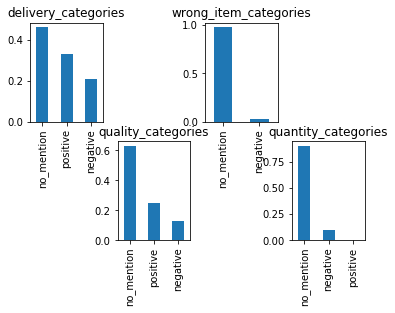

In [24]:

import matplotlib.patches as mpatches


fig = plt.figure()

plt.subplot(2, 4, 1)
s = pd.Series(reviewsm_pos_n.delivery_categories)
s = s.value_counts(normalize=True)
s.plot.bar()
plt.title(r'delivery_categories')



plt.subplot(2, 4, 3)
s = pd.Series(reviewsm_pos_n.wrong_item_categories)
s = s.value_counts(normalize=True)
s.plot.bar()
plt.title(r'wrong_item_categories')

plt.subplot(2, 4, 6)
s = pd.Series(reviewsm_pos_n.quality_categories)
s = s.value_counts(normalize=True)
s.plot.bar()
plt.title(r'quality_categories')

plt.subplot(2, 4, 8)
plt.title(r'quantity_categories')
s = pd.Series(reviewsm_pos_n.quantity_categories)
s = s.value_counts(normalize=True)
s.plot.bar()


plt.show()

In [25]:
print ('delivery_categories\n',reviewsm_pos_n.delivery_categories.value_counts(dropna=False))

delivery_categories
 no_mention    336
positive      240
negative      153
Name: delivery_categories, dtype: int64


In [26]:
print ('wrong_item_categories\n',reviewsm_pos_n.wrong_item_categories.value_counts(dropna=False))

wrong_item_categories
 no_mention    709
negative       20
Name: wrong_item_categories, dtype: int64


In [27]:
print ('quality_categories\n',reviewsm_pos_n.quality_categories.value_counts(dropna=False))

quality_categories
 no_mention    457
positive      179
negative       93
Name: quality_categories, dtype: int64


In [28]:
print ('quantity_categories\n',reviewsm_pos_n.quantity_categories.value_counts(dropna=False))

quantity_categories
 no_mention    655
negative       73
positive        1
Name: quantity_categories, dtype: int64


In [29]:
print(reviewsm_pos_n.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 3 to 379
Data columns (total 25 columns):
review_id                  729 non-null object
order_id                   729 non-null object
review_score               729 non-null float64
review_comment_title       729 non-null object
review_comment_message     729 non-null object
review_creation_date       729 non-null object
review_answer_timestamp    729 non-null object
concat                     729 non-null object
delivery_pos               556 non-null float64
quality_pos                556 non-null float64
quantity_pos               554 non-null float64
cs_pos                     554 non-null float64
price_pos                  554 non-null float64
delivery                   558 non-null float64
delivery_not_del           558 non-null float64
quality                    558 non-null float64
quantity_parcial           558 non-null float64
wrong_item                 558 non-null float64
cs                         558 non-nul

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words=stopwords)
features = tfidf.fit_transform(reviewsm_pos_n.review_comment).toarray()
labels = reviewsm_pos_n.delivery_categories
features.shape

(729, 297)

In [31]:
reviewsm_chi2= reviewsm_pos_n
list(reviewsm_chi2.columns.values)

['review_id',
 'order_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'concat',
 'delivery_pos',
 'quality_pos',
 'quantity_pos',
 'cs_pos',
 'price_pos',
 'delivery',
 'delivery_not_del',
 'quality',
 'quantity_parcial',
 'wrong_item',
 'cs',
 'review_comment',
 'delivery_categories',
 'quality_categories',
 'quantity_categories',
 'wrong_item_categories',
 'quant_wrong_categories']

In [32]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for delivery_, delivery_categories in sorted(reviewsm_pos_n.items()):
  features_chi2 = chi2(features, labels == delivery_categories)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(delivery_))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))

# 'concat':
  . Most correlated unigrams:
. entrega
. embalagem
  . Most correlated bigrams:
. entrega antes
. âˆšãtimo produto
  . Most correlated trigrams:
. entrega dentro prazo
. entrega antes prazo
# 'cs':
  . Most correlated unigrams:
. entrega
. embalagem
  . Most correlated bigrams:
. entrega antes
. âˆšãtimo produto
  . Most correlated trigrams:
. entrega dentro prazo
. entrega antes prazo
# 'cs_pos':
  . Most correlated unigrams:
. entrega
. embalagem
  . Most correlated bigrams:
. entrega antes
. âˆšãtimo produto
  . Most correlated trigrams:
. entrega dentro prazo
. entrega antes prazo
# 'delivery':
  . Most correlated unigrams:
. entrega
. embalagem
  . Most correlated bigrams:
. entrega antes
. âˆšãtimo produto
  . Most correlated trigrams:
. entrega dentro prazo
. entrega antes prazo
# 'delivery_categories':
  . Most correlated unigrams:
. entrega
. embalagem
  . Most correlated bigrams:
. entrega antes
. âˆšãtimo produto
  . Most correlated trigrams:
. entrega dentro pr

In [33]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for delivery_, quality_categories in sorted(reviewsm_pos_n.items()):
  features_chi2 = chi2(features, labels == delivery_categories)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(delivery_))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))

# 'concat':
  . Most correlated unigrams:
. entrega
. prazo
  . Most correlated bigrams:
. chegou antes
. antes prazo
  . Most correlated trigrams:
. entrega antes prazo
. chegou antes prazo
# 'cs':
  . Most correlated unigrams:
. entrega
. prazo
  . Most correlated bigrams:
. chegou antes
. antes prazo
  . Most correlated trigrams:
. entrega antes prazo
. chegou antes prazo
# 'cs_pos':
  . Most correlated unigrams:
. entrega
. prazo
  . Most correlated bigrams:
. chegou antes
. antes prazo
  . Most correlated trigrams:
. entrega antes prazo
. chegou antes prazo
# 'delivery':
  . Most correlated unigrams:
. entrega
. prazo
  . Most correlated bigrams:
. chegou antes
. antes prazo
  . Most correlated trigrams:
. entrega antes prazo
. chegou antes prazo
# 'delivery_categories':
  . Most correlated unigrams:
. entrega
. prazo
  . Most correlated bigrams:
. chegou antes
. antes prazo
  . Most correlated trigrams:
. entrega antes prazo
. chegou antes prazo
# 'delivery_not_del':
  . Most cor

In [34]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print('Accuracy: ', nltk.classify.accuracy(classifier, test_set))
print(classifier)
print(classifier.show_most_informative_features(400))
print(classifier.most_informative_features(400))

NameError: name 'documents' is not defined

## delivery_categories

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words=stopwords)
features = tfidf.fit_transform(reviewsm_pos_n.review_comment).toarray()
labels = reviewsm_pos_n.delivery_categories
features.shape

(729, 297)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(reviewsm_pos_n['review_comment'], reviewsm_pos_n['delivery_categories'], random_state = 0)
count_vect = CountVectorizer(ngram_range=(1, 3))
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


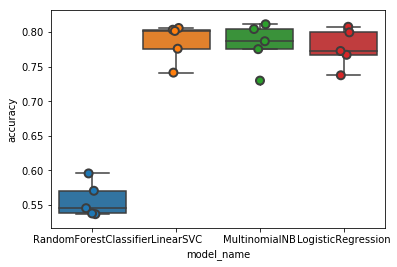

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='f1_weighted', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [38]:
print(cv_df.groupby('model_name').accuracy.mean())


model_name
LinearSVC                 0.785776
LogisticRegression        0.777038
MultinomialNB             0.781644
RandomForestClassifier    0.557154
Name: accuracy, dtype: float64


In [74]:

def mod_select(cat):
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words=stopwords)
    features = tfidf.fit_transform(reviewsm_pos_n.review_comment).toarray()
    labels = reviewsm_pos_n[cat]
    features.shape
    
   
    models = [
        RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
        LinearSVC(),
        SVC(C = 700, gamma = 0.001, kernel = 'rbf' ),
        MultinomialNB(),
        LogisticRegression(random_state=0),
    ]
    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []
    for model in models:
      model_name = model.__class__.__name__
      accuracies = cross_val_score(model, features, labels, scoring='f1_weighted', cv=CV)
      for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
    import seaborn as sns
    sns.boxplot(x='model_name', y='accuracy', data=cv_df)
    sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)
    plt.show()
    
    print(cv_df.groupby('model_name').accuracy.mean())



/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


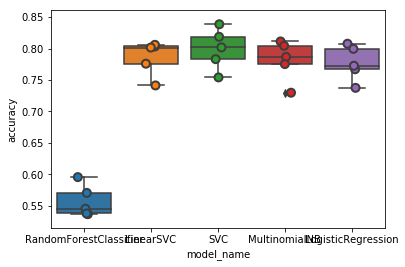

model_name
LinearSVC                 0.785776
LogisticRegression        0.777038
MultinomialNB             0.781644
RandomForestClassifier    0.557154
SVC                       0.799437
Name: accuracy, dtype: float64


In [75]:
mod_select('delivery_categories')

In [76]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,DELIVERY,quality,...,delivery_not del,quality .1,quantity.1,wrong_item,cs.1,Unnamed: 19,review_comment,predicted_quantity,review_comment_t,review_comment_t_stem
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,1/18/18 0:00,1/18/18 21:46,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,no_mention,[],[]
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,3/10/18 0:00,3/11/18 3:05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,no_mention,[],[]
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2/17/18 0:00,2/18/18 14:36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,no_mention,[],[]
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,4/21/17 0:00,4/21/17 22:02,Recebi bem antes do prazo estipulado.,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,recebi bem antes do prazo estipulado,no_mention,"[recebi, bem, antes, do, prazo, estipulado]","[receb, bem, ant, do, praz, estipul]"
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,3/1/18 0:00,3/2/18 10:26,Parabéns lojas lannister adorei comprar pela I...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,parabéns lojas lannister adorei comprar pela i...,no_mention,"[parabéns, lojas, lannister, adorei, comprar, ...","[parabém, loj, lannist, ador, compr, pel, inte..."
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,,,4/13/18 0:00,4/16/18 0:39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,no_mention,[],[]
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,,,7/16/17 0:00,7/18/17 19:30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,no_mention,[],[]
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,,,8/14/18 0:00,8/14/18 21:36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,no_mention,[],[]
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,,,5/17/17 0:00,5/18/17 12:05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,no_mention,[],[]
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,5/22/18 0:00,5/23/18 16:45,recomendoaparelho eficiente. no site a marca d...,0.0,0.0,...,0.0,0,0.0,1.0,0.0,NaN,recomendo aparelho eficiente no site a marca d...,negative,"[recomendo, aparelho, eficiente, no, site, a, ...","[recom, aparelh, efici, no, sit, a, marc, do, ..."


In [77]:
reviews['predicted_delivery'] = model.predict(tfidf.transform( reviews['review_comment']).toarray())

In [ ]:
reviews

In [78]:

from sklearn.model_selection import GridSearchCV


   



# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}


param_grid = [
  {'C': [1, 10, 100, 1000, 1100], 'kernel': ['linear']},
  {'C': [1, 10, 100, 200, 300, 500, 600, 700, 740, 800, 900, 1000, 1100], 'gamma': [0.01, 0.0008, 0.001, 0.002, 0.0001],  'kernel': ['rbf']},
  #{'C': [1, 10, 100, 1000, 1100], 'gamma': [0.01, 0.001, 0.0001], 'degree' : [0, 1, 2, 3, 4, 5, 6], 'kernel': ['poly']},
    
 ]

# Instantiate the logistic regression classifier: logreg
svc = SVC()

# Instantiate the GridSearchCV object: logreg_cv
svc_cv = GridSearchCV(svc, param_grid, cv=5)

# Fit it to the training data
svc_cv.fit(features, labels)

# Print the optimal parameters and best score
print("Tuned svc Parameter: {}".format(svc_cv.best_params_))
print("Tuned svc Accuracy: {}".format(svc_cv.best_score_))
print("Tuned svc : {}".format(svc_cv.best_estimator_))






/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Tuned svc Parameter: {'C': 700, 'gamma': 0.002, 'kernel': 'rbf'}
Tuned svc Accuracy: 0.9327846364883402
Tuned svc : SVC(C=700, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [79]:
svc_= svc_cv.best_estimator_

In [80]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words=stopwords)
features = tfidf.fit_transform(reviewsm_pos_n.review_comment).toarray()
labels = reviewsm_pos_n['delivery_categories']


model  = svc_
model.fit(features, labels)
reviews['predicted_delivery'] = model.predict(tfidf.transform( reviews['review_comment']).toarray())

/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anel/anaconda3/lib/python

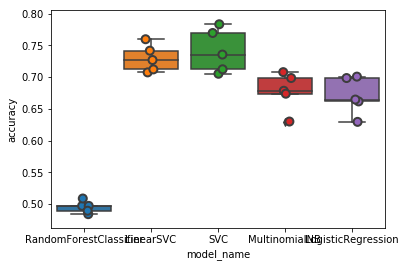

model_name
LinearSVC                 0.729537
LogisticRegression        0.670982
MultinomialNB             0.677712
RandomForestClassifier    0.495251
SVC                       0.741153
Name: accuracy, dtype: float64


In [81]:
mod_select('quality_categories')

In [82]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words=stopwords)
features = tfidf.fit_transform(reviewsm_pos_n.review_comment).toarray()
labels = reviewsm_pos_n['quality_categories']




In [83]:

from sklearn.model_selection import GridSearchCV


   



# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}


param_grid = [
  {'C': [1, 10, 100, 1000, 1100], 'kernel': ['linear']},
  {'C': [1, 10, 100, 700, 900, 1000, 1100], 'gamma': [0.01,  0.001,  0.0001],  'kernel': ['rbf']},
  #{'C': [1, 10, 100, 1000, 1100], 'gamma': [0.01, 0.001, 0.0001], 'degree' : [0, 1, 2, 3, 4, 5, 6], 'kernel': ['poly']},
    
 ]

# Instantiate the logistic regression classifier: logreg
svc = SVC()

# Instantiate the GridSearchCV object: logreg_cv
svc_cv = GridSearchCV(svc, param_grid, cv=5)

# Fit it to the training data
svc_cv.fit(features, labels)

# Print the optimal parameters and best score
print("Tuned svc Parameter: {}".format(svc_cv.best_params_))
print("Tuned svc Accuracy: {}".format(svc_cv.best_score_))
print("Tuned svc Accuracy: {}".format(svc_cv.best_estimator_))





Tuned svc Parameter: {'C': 1, 'kernel': 'linear'}
Tuned svc Accuracy: 0.766803840877915
Tuned svc Accuracy: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [84]:
model  = svc_cv.best_estimator_
model.fit(features, labels)
reviews['predicted_quality'] = model.predict(tfidf.transform( reviews['review_comment']).toarray())

In [85]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,DELIVERY,quality,...,quantity.1,wrong_item,cs.1,Unnamed: 19,review_comment,predicted_quantity,review_comment_t,review_comment_t_stem,predicted_delivery,predicted_quality
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,1/18/18 0:00,1/18/18 21:46,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,3/10/18 0:00,3/11/18 3:05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2/17/18 0:00,2/18/18 14:36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,4/21/17 0:00,4/21/17 22:02,Recebi bem antes do prazo estipulado.,1.0,0.0,...,NaN,NaN,NaN,NaN,recebi bem antes do prazo estipulado,no_mention,"[recebi, bem, antes, do, prazo, estipulado]","[receb, bem, ant, do, praz, estipul]",positive,no_mention
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,3/1/18 0:00,3/2/18 10:26,Parabéns lojas lannister adorei comprar pela I...,NaN,NaN,...,NaN,NaN,NaN,NaN,parabéns lojas lannister adorei comprar pela i...,no_mention,"[parabéns, lojas, lannister, adorei, comprar, ...","[parabém, loj, lannist, ador, compr, pel, inte...",no_mention,no_mention
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,,,4/13/18 0:00,4/16/18 0:39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,,,7/16/17 0:00,7/18/17 19:30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,,,8/14/18 0:00,8/14/18 21:36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,,,5/17/17 0:00,5/18/17 12:05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,5/22/18 0:00,5/23/18 16:45,recomendoaparelho eficiente. no site a marca d...,0.0,0.0,...,0.0,1.0,0.0,NaN,recomendo aparelho eficiente no site a marca d...,negative,"[recomendo, aparelho, eficiente, no, site, a, ...","[recom, aparelh, efici, no, sit, a, marc, do, ...",no_mention,no_mention


/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average,

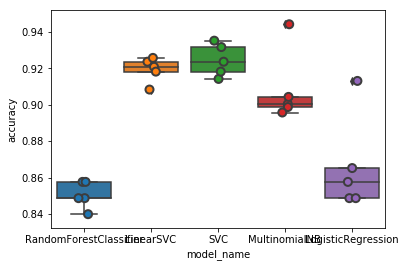

model_name
LinearSVC                 0.919415
LogisticRegression        0.866667
MultinomialNB             0.908730
RandomForestClassifier    0.850491
SVC                       0.924652
Name: accuracy, dtype: float64


In [86]:
mod_select('quantity_categories')

In [87]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words= stopwords)
features = tfidf.fit_transform(reviewsm_pos_n.review_comment).toarray()
labels = reviewsm_pos_n['quantity_categories']



features.shape

(729, 297)

In [88]:

from sklearn.model_selection import GridSearchCV


   



# Create the hyperparameter grid


param_grid = [
  {'C': [1, 10, 100, 1000, 1100], 'kernel': ['linear']},
  {'C': [1, 10, 100, 200, 300, 500, 600, 700, 740, 800, 900, 1000, 1100], 'gamma': [0.01, 0.0008, 0.001, 0.002,  0.003 , 0.0001],  'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000, 1100], 'gamma': [0.01, 0.001, 0.0001], 'degree' : [0, 1, 2, 3, 4, 5, 6], 'kernel': ['poly']},
    
 ]

# Instantiate the logistic regression classifier: logreg
svc = SVC()

# Instantiate the GridSearchCV object: logreg_cv
svc_cv = GridSearchCV(svc, param_grid, cv=5)

# Fit it to the training data
svc_cv.fit(features, labels)

# Print the optimal parameters and best score
print("Tuned svc Parameter: {}".format(svc_cv.best_params_))
print("Tuned svc Accuracy: {}".format(svc_cv.best_score_))
print("Tuned svc Accuracy: {}".format(svc_cv.best_estimator_))





/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Tuned svc Parameter: {'C': 1, 'kernel': 'linear'}
Tuned svc Accuracy: 0.9355281207133059
Tuned svc Accuracy: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [108]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
features = tfidf.fit_transform(reviewsm_pos_n.review_comment).toarray()
labels = reviewsm_pos_n['quantity_categories']


model  = svc_cv.best_estimator_
model.fit(features, labels)
reviews['predicted_quantity'] = model.predict(tfidf.transform( reviews['review_comment']).toarray())

In [111]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,concat,DELIVERY,quality,...,quantity.1,wrong_item,cs.1,Unnamed: 19,review_comment,predicted_quantity,review_comment_t,review_comment_t_stem,predicted_delivery,predicted_quality
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,1/18/18 0:00,1/18/18 21:46,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,3/10/18 0:00,3/11/18 3:05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2/17/18 0:00,2/18/18 14:36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,4/21/17 0:00,4/21/17 22:02,Recebi bem antes do prazo estipulado.,1.0,0.0,...,NaN,NaN,NaN,NaN,recebi bem antes do prazo estipulado,no_mention,"[recebi, bem, antes, do, prazo, estipulado]","[receb, bem, ant, do, praz, estipul]",positive,no_mention
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,3/1/18 0:00,3/2/18 10:26,Parabéns lojas lannister adorei comprar pela I...,NaN,NaN,...,NaN,NaN,NaN,NaN,parabéns lojas lannister adorei comprar pela i...,no_mention,"[parabéns, lojas, lannister, adorei, comprar, ...","[parabém, loj, lannist, ador, compr, pel, inte...",no_mention,no_mention
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,,,4/13/18 0:00,4/16/18 0:39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,,,7/16/17 0:00,7/18/17 19:30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,,,8/14/18 0:00,8/14/18 21:36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,,,5/17/17 0:00,5/18/17 12:05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,no_mention,[],[],no_mention,no_mention
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,5/22/18 0:00,5/23/18 16:45,recomendoaparelho eficiente. no site a marca d...,0.0,0.0,...,0.0,1.0,0.0,NaN,recomendo aparelho eficiente no site a marca d...,no_mention,"[recomendo, aparelho, eficiente, no, site, a, ...","[recom, aparelh, efici, no, sit, a, marc, do, ...",no_mention,no_mention


In [53]:
from nltk.stem.porter import PorterStemmer
stemmer = nltk.stem.RSLPStemmer()
stopwords = nltk.corpus.stopwords.words('portuguese')
#stopwords = set(stopwords) - set(('não'))
#noise_words = ['recebemo', 'recebimento', 'nan','produto','correio', 'entregu','recomendo','compra', 'comprar','recebi', 'compra', 'entregu', 'entrega', 'entregoa', 'comprei',  'veio', 'é', 'pedido' , 'chegou', 'apena']
#recebemo" + 0.009*"funciona" + 0.009*"recebimento"
#" + 0.025*"veio" + 0.024*"é" + 0.017*"entregu" + 0.013*"pedido" + 0.013*"chegou" + 0.011*"apena" + 0.011*"qualidad" + 0.010*"recomendo"



reviews['review_comment_t']  = reviews['review_comment'] .str.replace('[^\w\s]','')
reviews['review_comment_t']  = reviews['review_comment_t'] .str.lower().str.split()
#reviews['review_comment_t'] =  reviews['review_comment_t'].apply(lambda x: [item for item in x if item not in stopwords ])

#reviews['review_comment_t'] =  reviews['review_comment_t'].apply(lambda x: [item for item in x if item not in noise_words ])

reviews['review_comment_t_stem'] = reviews['review_comment_t'].apply(lambda x: [stemmer.stem(y) for y in x])
reviews[reviews['review_score']<3][['review_comment','review_comment_t']].head()


,review_comment,review_comment_t
5,,[]
16,gostaria de saber o que houve sempre recebi e ...,"[gostaria, de, saber, o, que, houve, sempre, r..."
19,não chegou meu produto péssimo,"[não, chegou, meu, produto, péssimo]"
29,não gostei comprei gato por lebre,"[não, gostei, comprei, gato, por, lebre]"
32,sempre compro pela internet e a entrega ocorre...,"[sempre, compro, pela, internet, e, a, entrega..."


In [56]:
import gensim
dictionary = gensim.corpora.Dictionary(processed_docs_pos)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

ModuleNotFoundError: No module named 'gensim'

In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs_pos]
bow_corpus[4310]

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2, workers=2)

In [ ]:
#df = reviews_only[['review_comment_message', 'review_score']]

#classification
df = reviews[['review_comment_t_stem', 'review_pos_neg']]



In [ ]:

df.apply(tuple, axis=1)

df.head()

In [ ]:
sum = []
for wlist in reviews['review_comment_t_stem']:
  sum = sum + wlist

In [ ]:
sum

In [ ]:
#mergedlist = list(sum)
documents = [tuple(x) for x in df.values]


In [ ]:
from itertools import chain
all_words = nltk.FreqDist(sum)
#word_features = list(all_words)[:600]
print(type(dict(all_words).keys()))
d=dict(all_words).copy().keys()
word_features ={x for x in chain(dict(all_words).copy().keys()) if x}

In [ ]:
#pd.options.display.max_colwidth = 1000
#print(reviews[reviews['review_comment'].str.contains("atrás")]['review_comment'].shape)
#reviews[reviews['review_comment'].str.contains("atrás")]['review_comment'].head(10)
#mixed

In [ ]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

#random.shuffle(documents)


In [ ]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
print('Accuracy: ', nltk.classify.accuracy(classifier, test_set))


In [ ]:
print(classifier)
print(classifier.show_most_informative_features(400))
print(classifier.most_informative_features(400))




#Manual Check
Checkig comments that may inducate a reason fora negative or positive review -  quality, quantity, delivery, packaging 

#Feature Engineering 
Feature Construction: The manual construction of new features from raw data

In [67]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
o['order_purchase_timestamp']= pd.to_datetime(o['order_purchase_timestamp'])
o['order_approved_at']= pd.to_datetime(o['order_approved_at'])
o['order_delivered_carrier_date']= pd.to_datetime(o['order_delivered_carrier_date'])
o['order_delivered_customer_date']= pd.to_datetime(o['order_delivered_customer_date'])
o['order_estimated_delivery_date']= pd.to_datetime(o['order_estimated_delivery_date'])
o['delivery_delta'] = o['order_delivered_customer_date'] - o['order_purchase_timestamp']
o['delivery_delta'] = o['delivery_delta'] /np.timedelta64(1,'h')

o['est_delta'] = o['order_estimated_delivery_date'] - o['order_purchase_timestamp']
o['est_delta'] = o['est_delta'] /np.timedelta64(1,'h')

o['delivery_est_delta'] = o['est_delta'] - o['delivery_delta'] 
o['delivery_est_delta'] = o['delivery_est_delta']
print(o.describe())
o.head(2)

       delivery_delta     est_delta  delivery_est_delta
count    96476.000000  99441.000000        96476.000000
mean       301.408855    570.423598          268.298877
std        229.116717    211.976912          244.466717
min         12.801944     39.575833        -4535.401944
25%        162.393681    439.960556          153.360000
50%        245.226111    557.768889          286.774583
75%        377.287847    682.196667          389.865208
max       5031.086667   3723.251111         3504.386944


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delta,est_delta,delivery_est_delta
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,202.477778,373.057500,170.579722
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,330.768889,459.306389,128.537500


In [68]:
p['vol'] =  p.product_length_cm*p.product_height_cm*p.product_width_cm

#Joining Data

merging orders, product, payment

In [134]:
reviews = reviews[['review_id',	'order_id','predicted_delivery',	'predicted_quality',	'predicted_quantity']]

In [135]:
reviews

,review_id,order_id,predicted_delivery,predicted_quality,predicted_quantity
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,no_mention,no_mention,no_mention
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,no_mention,no_mention,no_mention
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,no_mention,no_mention,no_mention
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,positive,no_mention,no_mention
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,no_mention,no_mention,no_mention
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,no_mention,no_mention,no_mention
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,no_mention,no_mention,no_mention
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,no_mention,no_mention,no_mention
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,no_mention,no_mention,no_mention
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,no_mention,no_mention,no_mention


In [136]:
#join oreder items data, oreder payment, oreder review, oreders dataset, product 

# oreders + order items 


reviews_only = reviews.dropna()
reviews_only.head()
result = pd.merge(o, o_i, how='outer', on=['order_id'])


# add product information 
result = pd.merge(result, p, how='outer', on=['product_id'])
#add reviews
result = pd.merge(result, reviews_only, how='outer', on=['order_id'])
#creating dummies var for categories
result = pd.get_dummies(result, prefix='Category_', columns=['product_category_name'])

# add payments 
result = pd.merge(result, payments, how='outer', on=['order_id'])

result = pd.get_dummies(result, prefix='type', columns=['payment_type'])

#result[['order_id', 'customer_id', 'product_id' , 'seller_id', 'order_item_id', 'review_score']]
#result.drop(['order_purchase_timestamp','order_approved_at',	'order_delivered_carrier_date',	'order_delivered_customer_date',	'order_estimated_delivery_date','shipping_limit_date'])
result.head()

#list(result.columns.values) #time, day product_description_lenght

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delta,est_delta,...,Category__telefonia_fixa,Category__utilidades_domesticas,payment_sequential,payment_installments,payment_value,type_boleto,type_credit_card,type_debit_card,type_not_defined,type_voucher
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,202.477778,373.057500,...,0,1,1.0,1.0,18.12,0,1,0,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,202.477778,373.057500,...,0,1,3.0,1.0,2.00,0,0,0,0,1
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,202.477778,373.057500,...,0,1,2.0,1.0,18.59,0,0,0,0,1
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,68.253333,293.508056,...,0,1,1.0,3.0,37.77,0,1,0,0,0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,120.087222,293.586944,...,0,1,1.0,1.0,37.77,0,1,0,0,0


In [137]:
result['delivery'] = result['predicted_delivery'].map({'positive': 1 , 'negative':0})
result['quality'] = result['predicted_quality'].map({'positive': 1 , 'negative':0})
result['quantity'] = result['predicted_quantity'].map({'positive': 1 , 'negative':0})



In [138]:
list(result.columns.values)

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'delivery_delta',
 'est_delta',
 'delivery_est_delta',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'vol',
 'review_id',
 'predicted_delivery',
 'predicted_quality',
 'predicted_quantity',
 'Category__agro_industria_e_comercio',
 'Category__alimentos',
 'Category__alimentos_bebidas',
 'Category__artes',
 'Category__artes_e_artesanato',
 'Category__artigos_de_festas',
 'Category__artigos_de_natal',
 'Category__audio',
 'Category__automotivo',
 'Category__bebes',
 'Category__bebidas',
 'Category__beleza_saude',
 'Category__brinquedos',
 'Category__cama_mesa_banho',
 'Category__

In [139]:
result = result.groupby('order_id').agg({
                                        'delivery': 'max',	
                                        'quality': 'max',	
                                                               
                                        'price':'max', 
                                        'product_photos_qty': 'min','product_photos_qty': 'max', 'product_photos_qty': 'sum', 
                                        'vol': 'min','vol': 'max',
                                        'delivery_est_delta': 'max',
                                        'est_delta':'max',
                                        'delivery_delta':'max', 
                                        'freight_value': 'sum',
                                        'product_name_lenght': 'max',	'product_description_lenght':'max',
                                        'product_name_lenght': 'min',	'product_description_lenght':'min',
                                        'type_credit_card': 'sum',
                                        'type_debit_card': 'sum',
                                        'type_not_defined': 'sum',
                                        'type_voucher': 'sum',
                             'payment_sequential': 'max',
 'payment_installments':'max',
 'payment_value':'sum',
                                                                        'Category__pet_shop': 'sum',
                                                                        'Category__portateis_casa_forno_e_cafe': 'sum' ,
                                                                        'Category__agro_industria_e_comercio': 'sum' ,
                                                                        'Category__alimentos': 'sum' ,
                                                                        'Category__alimentos_bebidas': 'sum' ,
                                                                        'Category__artes': 'sum' ,
                                                                        'Category__artes_e_artesanato': 'sum' ,
                                                                        'Category__artigos_de_festas': 'sum' ,
                                                                        'Category__artigos_de_natal': 'sum' ,
                                                                        'Category__audio': 'sum' ,
                                                                        'Category__automotivo': 'sum' ,
                                                                        'Category__bebes': 'sum' ,
                                                                        'Category__bebidas': 'sum' ,
                                                                        'Category__beleza_saude': 'sum' ,
                                                                        'Category__brinquedos': 'sum' ,
                                                                        'Category__cama_mesa_banho': 'sum' ,
                                                                        'Category__casa_conforto': 'sum' ,
                                                                        'Category__casa_conforto_2': 'sum' ,
                                                                        'Category__casa_construcao': 'sum' ,
                                                                        'Category__cds_dvds_musicais': 'sum' ,
                                                                        'Category__cine_foto': 'sum' ,
                                                                        'Category__climatizacao': 'sum' ,
                                                                        'Category__consoles_games': 'sum' ,
                                                                        'Category__construcao_ferramentas_construcao': 'sum' ,
                                                                        'Category__construcao_ferramentas_ferramentas': 'sum' ,
                                                                        'Category__construcao_ferramentas_iluminacao': 'sum' ,
                                                                        'Category__construcao_ferramentas_jardim': 'sum' ,
                                                                        'Category__construcao_ferramentas_seguranca': 'sum' ,
                                                                        'Category__cool_stuff': 'sum' ,
                                                                        'Category__dvds_blu_ray': 'sum' ,
                                                                        'Category__eletrodomesticos': 'sum' ,
                                                                        'Category__eletrodomesticos_2': 'sum' ,
                                                                        'Category__eletronicos': 'sum' ,
                                                                        'Category__eletroportateis': 'sum' ,
                                                                        'Category__esporte_lazer': 'sum' ,
                                                                        'Category__fashion_bolsas_e_acessorios': 'sum' ,
                                                                        'Category__fashion_calcados': 'sum' ,
                                                                        'Category__fashion_esporte': 'sum' ,
                                                                        'Category__fashion_roupa_feminina': 'sum' ,
                                                                        'Category__fashion_roupa_infanto_juvenil': 'sum' ,
                                                                        'Category__fashion_roupa_masculina': 'sum' ,
                                                                        'Category__fashion_underwear_e_moda_praia': 'sum' ,
                                                                        'Category__ferramentas_jardim': 'sum' ,
                                                                        'Category__flores': 'sum' ,
                                                                        'Category__fraldas_higiene': 'sum' ,
                                                                        'Category__industria_comercio_e_negocios': 'sum' ,
                                                                        'Category__informatica_acessorios': 'sum' ,
                                                                        'Category__instrumentos_musicais': 'sum' ,
                                                                        'Category__la_cuisine': 'sum' ,
                                                                        'Category__livros_importados': 'sum' ,
                                                                        'Category__livros_interesse_geral': 'sum' ,
                                                                        'Category__livros_tecnicos': 'sum' ,
                                                                        'Category__malas_acessorios': 'sum' ,
                                                                        'Category__market_place': 'sum' ,
                                                                        'Category__moveis_colchao_e_estofado': 'sum' ,
                                                                        'Category__moveis_cozinha_area_de_servico_jantar_e_jardim': 'sum' ,
                                                                        'Category__moveis_decoracao': 'sum' ,
                                                                        'Category__moveis_escritorio': 'sum' ,
                                                                        'Category__moveis_quarto': 'sum' ,
                                                                        'Category__moveis_sala': 'sum' ,
                                                                        'Category__musica': 'sum' ,
                                                                        'Category__papelaria': 'sum' ,
                                                                        'Category__pc_gamer': 'sum' ,
                                                                        'Category__pcs': 'sum' ,
                                                                        'Category__perfumaria': 'sum' ,
                                                                        'Category__pet_shop': 'sum' ,
                                                                        'Category__portateis_casa_forno_e_cafe': 'sum' ,
                                                                        'Category__portateis_cozinha_e_preparadores_de_alimentos': 'sum' ,
                                                                        'Category__relogios_presentes': 'sum' ,
                                                                        'Category__seguros_e_servicos': 'sum' ,
                                                                        'Category__sinalizacao_e_seguranca': 'sum' ,
                                                                        'Category__tablets_impressao_imagem': 'sum' ,
                                                                        'Category__telefonia': 'sum' ,
                                                                        'Category__telefonia_fixa': 'sum' ,
                                                                        'Category__utilidades_domesticas': 'sum' })

In [ ]:
result_d= result.drop(['quality'], axis=1)
result_d =result_d.dropna()
delivery = result_d['delivery']
result_d= result_d.drop(['delivery'], axis=1)
result_d

In [ ]:
models = [
        RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
        LinearSVC(),
        SVC(C = 700, gamma = 0.001, kernel = 'rbf' ),
        MultinomialNB(),
        LogisticRegression(random_state=0),
    ]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, result_d, delivery, scoring='f1_weighted', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
    
print(cv_df.groupby('model_name').accuracy.mean())



In [154]:

from sklearn.model_selection import GridSearchCV


# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}



# Instantiate the logistic regression classifier: logreg
logr = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logr_cv = GridSearchCV(logr, param_grid, cv=5)

# Fit it to the training data
logr_cv.fit(result_d, delivery)

# Print the optimal parameters and best score
print("Tuned logreg Parameter: {}".format(logr_cv.best_params_))
print("Tuned logreg Accuracy: {}".format(logr_cv.best_score_))
print("Best Estimator: {}".format(logr_cv.best_estimator_))





Tuned logreg Parameter: {'C': 0.43939705607607948, 'penalty': 'l1'}
Tuned logreg Accuracy: 0.7108250899280576
Best Estimator: LogisticRegression(C=0.43939705607607948, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [147]:
model_list = [LogisticRegression(), LinearSVC(), RandomForestClassifier() , KNeighborsClassifier(), GaussianNB(), Perceptron() , SGDClassifier(), DecisionTreeClassifier()]
for i in model_list:
  model = i.fit(result_d, delivery)
  print( type(i).__name__, 'Accuracy: ',  np.average(cross_val_score(i, result_d, delivery, scoring='f1_weighted', cv=5)))

LogisticRegression Accuracy:  0.686743236532
LinearSVC Accuracy:  0.463131380468
RandomForestClassifier Accuracy:  0.660775010567
KNeighborsClassifier Accuracy:  0.646498850721
GaussianNB Accuracy:  0.641186715748


/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/anel/anaconda3/lib/python3.6/site-p

Perceptron Accuracy:  0.540673877745


/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier Accuracy:  0.497171898028
DecisionTreeClassifier Accuracy:  0.616921475875


In [ ]:
logr_cv.best_estimator_


In [155]:
logistic = logr_cv.best_estimator_

In [156]:
logistic = logr_cv.best_estimator_
coefficients = pd.concat([pd.DataFrame(result_d.columns),pd.DataFrame(np.transpose(logistic.coef_), columns=['coef'])], axis = 1)
coefficients.sort_values(by=['coef'])

,0,coef
21,Category__artes,-0.657121
34,Category__casa_construcao,-0.566692
28,Category__bebidas,-0.558023
63,Category__instrumentos_musicais,-0.537993
25,Category__audio,-0.531569
38,Category__consoles_games,-0.504535
71,Category__moveis_cozinha_area_de_servico_janta...,-0.466418
31,Category__cama_mesa_banho,-0.426403
27,Category__bebes,-0.422973
46,Category__eletrodomesticos,-0.419406


In [157]:
coefficients.to_csv('hey.csv')

In [158]:
result_q= result.drop(['delivery'], axis=1)
result_q =result_q.dropna()
quality = result_q['quality']
result_q= result_q.drop(['quality'], axis=1)

model_list = [LogisticRegression(), LinearSVC(), RandomForestClassifier() , KNeighborsClassifier(), GaussianNB(), Perceptron() , SGDClassifier(), DecisionTreeClassifier()]
for i in model_list:
  model = i.fit(result_q, quality)
  print( type(i).__name__, 'Accuracy: ', np.average(cross_val_score(i, result_q, quality, scoring='f1_weighted', cv=5)))

LogisticRegression Accuracy:  0.517774361787


/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC Accuracy:  0.522513212108
RandomForestClassifier Accuracy:  0.58306752482
KNeighborsClassifier Accuracy:  0.57126297233
GaussianNB Accuracy:  0.555997196032


/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/anel/anaconda3/lib/python3.6/site-p

Perceptron Accuracy:  0.392660833338
SGDClassifier Accuracy:  0.46397725704


/Users/anel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


DecisionTreeClassifier Accuracy:  0.56940071568


In [160]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import  RandomizedSearchCV 


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = RandomForestClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(result_q, quality)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 6}
Best score is 0.6535391165513571


In [161]:
tree_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [177]:
randfor = tree_cv.best_estimator_
coefficients_qual = pd.concat([pd.DataFrame(result_d.columns, columns=['feature']),pd.DataFrame(np.transpose(randfor.feature_importances_), columns=['feature_importances'])], axis = 1)
coefficients_qual = coefficients_qual.sort_values(by=['feature_importances'])
coefficients_qual.to_csv('hey_again.csv')

[  7.98374517e-02   3.15616697e-02   8.70694341e-02   8.00542422e-02
   8.95545527e-02   7.83010625e-02   8.47032920e-02   8.19457528e-02
   9.55975794e-02   1.37834694e-02   9.05029715e-04   0.00000000e+00
   4.20548879e-03   5.66133420e-03   3.07015162e-02   7.60957758e-02
   5.25724183e-03   0.00000000e+00   7.75893936e-04   1.13258556e-04
   4.31517072e-05   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   3.58536953e-04   2.58265693e-03   4.07330331e-03
   0.00000000e+00   4.55676097e-03   3.72732687e-03   7.39200434e-03
   3.85128579e-04   0.00000000e+00   3.33314644e-03   0.00000000e+00
   0.00000000e+00   4.57486440e-05   1.94859935e-03   2.25403784e-03
   0.00000000e+00   2.90052615e-04   0.00000000e+00   0.00000000e+00
   1.01323362e-02   0.00000000e+00   3.45128074e-04   4.90222267e-05
   8.04749183e-03   2.09872048e-03   3.56478669e-03   1.01118814e-02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.86821794e-03   0.00000000e+00

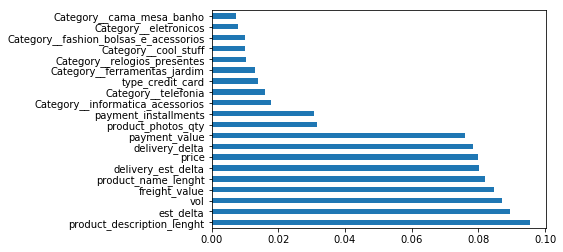

In [175]:
print(randfor.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(randfor.feature_importances_, index=result_d.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
result.head(2)
result['order_id'].duplicated()

In [ ]:
#join oreder items data, oreder payment, oreder review, oreders dataset, product 

# oreders + order items 
result = pd.merge(o, o_i, how='outer', on=['order_id'])


# add product information 
result = pd.merge(result, p, how='outer', on=['product_id'])
#add reviews
result = pd.merge(result, reviews_only, how='outer', on=['order_id'])
#creating dummies var for categories
result = pd.get_dummies(result, prefix='Category_', columns=['product_category_name'])
# add payments 
result = pd.merge(result, payments, how='outer', on=['order_id'])


#result[['order_id', 'customer_id', 'product_id' , 'seller_id', 'order_item_id', 'review_score']]
result.drop(columns=['order_purchase_timestamp','order_approved_at',	'order_delivered_carrier_date',	'order_delivered_customer_date',	'order_estimated_delivery_date','shipping_limit_date'])
list(result.columns.values)


In [ ]:
p

In [ ]:
#payments.order_id.loc['b81ef226f3fe1789b1e8b2acac839d17']
result.loc[payments['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687']
#payments

In [ ]:
payments['order_id'].duplicated()

In [ ]:

print(result.order_id.nunique())
print(result.customer_id.nunique())

In [ ]:
print(o_i.order_id.nunique())
print(o_i.customer_id.nunique())

In [ ]:
s = pd.read_csv('olist_sellers_dataset.csv')
print(s.info())
print(s.head())

#Reading Files

In [58]:
payments = pd.read_csv('brazilian-ecommerce/olist_order_payments_dataset.csv')
print(payments.describe())
print(payments.info())
print(payments.head())

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
                      

In [59]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [60]:
o = pd.read_csv('brazilian-ecommerce/olist_orders_dataset.csv')
print(o.info())
print(o.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB
None
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97

In [61]:
o_i = pd.read_csv('brazilian-ecommerce/olist_order_items_dataset.csv')
print(o_i.info())
print(o_i.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93

In [62]:
category = pd.read_csv('brazilian-ecommerce/product_category_name_translation.csv')
print(category.info())
print(category.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
product_category_name            71 non-null object
product_category_name_english    71 non-null object
dtypes: object(2)
memory usage: 1.2+ KB
None
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


In [63]:

customers = pd.read_csv('brazilian-ecommerce/olist_customers_dataset.csv')
print(customers.info())
print(customers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1            

In [64]:
geo = pd.read_csv('brazilian-ecommerce/olist_geolocation_dataset.csv')
print(geo.info())
print(geo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
geolocation_zip_code_prefix    1000163 non-null int64
geolocation_lat                1000163 non-null float64
geolocation_lng                1000163 non-null float64
geolocation_city               1000163 non-null object
geolocation_state              1000163 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo

In [65]:
geo_s = pd.read_csv('brazilian-ecommerce/olist_sellers_dataset.csv')
print(geo_s.info())
print(geo_s.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  


In [66]:
p = pd.read_csv('brazilian-ecommerce/olist_products_dataset.csv')
print(p.info())
print(p.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_do